🔄 Loading dataset...
✅ Dataset loaded successfully!
Shape: (100000, 46)
Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

🔎 Sample Data:
             Start_Time Weather_Condition
0  2016-02-08 05:46:00        Light Rain
1  2016-02-08 06:07:59        Light Rain
2  2016-02-08 06:49:27          Overcast
3  2016-02-08 07:23:34     Mostly Cloudy
4  2016-02-08 07:39:07     Mostly Cloudy


C:\Users\T.Vishnu priya\AppData\Local\Temp\ipykernel_21188\2372940136.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='mako')
C:\Users\T.Vishnu priya\AppData\Local\Temp\ipykernel_21188\2372940136.py:23: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\T.Vishnu priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


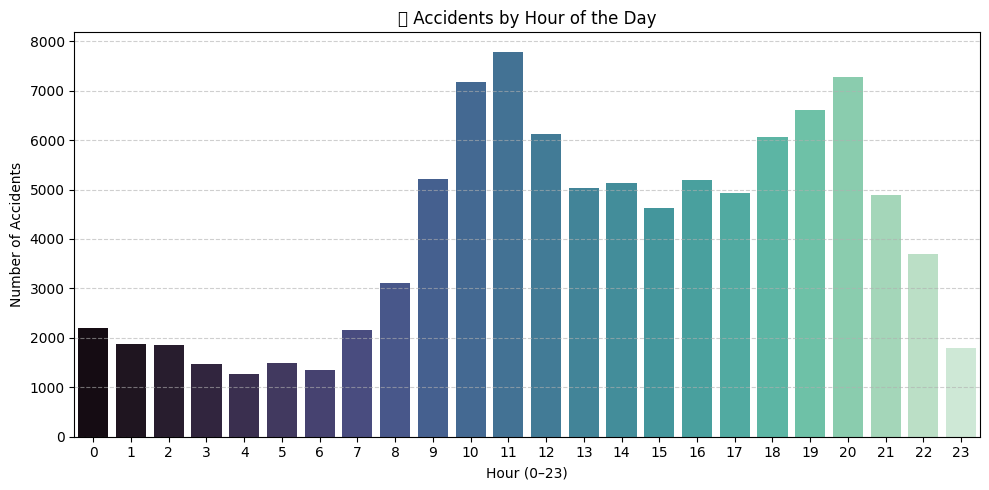

C:\Users\T.Vishnu priya\AppData\Local\Temp\ipykernel_21188\2372940136.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition',
C:\Users\T.Vishnu priya\AppData\Local\Temp\ipykernel_21188\2372940136.py:34: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\T.Vishnu priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


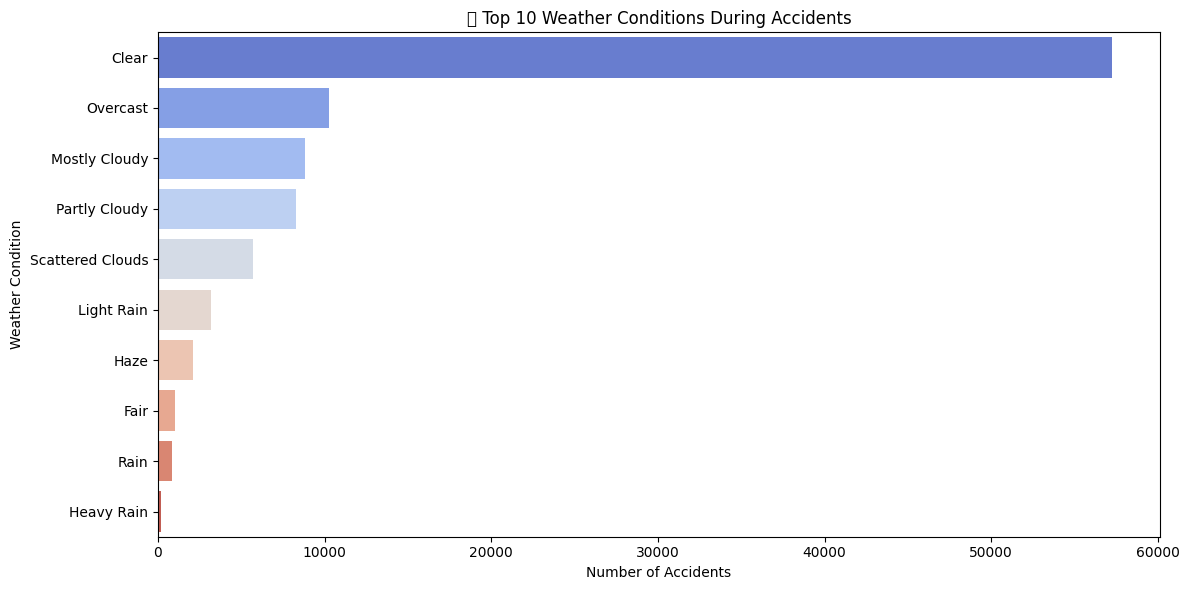

C:\Users\T.Vishnu priya\AppData\Local\Temp\ipykernel_21188\2372940136.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, order=weekday_order, palette='crest')
C:\Users\T.Vishnu priya\AppData\Local\Temp\ipykernel_21188\2372940136.py:42: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\T.Vishnu priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


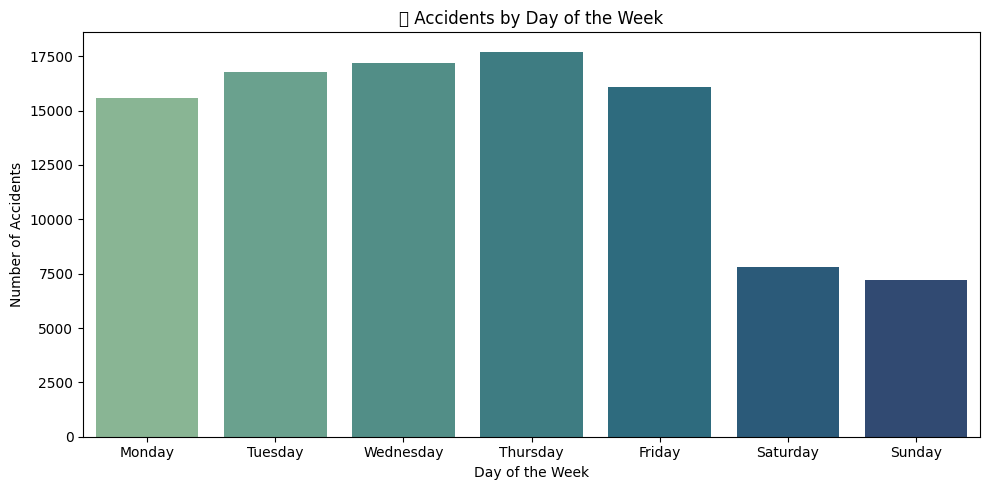


🌍 Generating accident hotspot map using 500 sample points...
✅ Map saved as 'accident_hotspots_map.html'

🔎 SUMMARY OF INSIGHTS
--------------------------------------------------
Top 5 Weather Conditions:
Weather_Condition
Clear               57255
Overcast            10255
Mostly Cloudy        8829
Partly Cloudy        8260
Scattered Clouds     5684
Name: count, dtype: int64
--------------------------------------------------
Most Accident-Prone Hours:
Hour
11    7791
20    7286
10    7182
19    6608
12    6133
Name: count, dtype: int64
--------------------------------------------------
Accidents by Day of the Week:
Weekday
Thursday     17716
Wednesday    17203
Tuesday      16756
Friday       16102
Monday       15572
Saturday      7830
Sunday        7217
Name: count, dtype: int64
--------------------------------------------------


''

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
print("🔄 Loading dataset...")
df = pd.read_csv(r"C:\Users\T.Vishnu priya\Downloads\archive\US_Accidents_March23.csv", 
                 low_memory=False, 
                 nrows=100000)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
print("\n🔎 Sample Data:\n", df[['Start_Time', 'Weather_Condition']].head())
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition', 'Start_Time'])
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='mako')
plt.title('🕒 Accidents by Hour of the Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
sns.countplot(y='Weather_Condition', 
              data=df[df['Weather_Condition'].isin(top_weather)],
              order=top_weather,
              palette='coolwarm')
plt.title('🌦️ Top 10 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Weekday', data=df, order=weekday_order, palette='crest')
plt.title('📅 Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()
print("\n🌍 Generating accident hotspot map using 500 sample points...")
sample = df[['Start_Lat', 'Start_Lng']].dropna().sample(500)

accident_map = folium.Map(location=[sample['Start_Lat'].mean(), sample['Start_Lng'].mean()],
                          zoom_start=5, tiles='CartoDB positron')

for i in sample.itertuples():
    folium.CircleMarker(
        location=[i.Start_Lat, i.Start_Lng],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.4
    ).add_to(accident_map)

accident_map.save("accident_hotspots_map.html")
print("✅ Map saved as 'accident_hotspots_map.html'")
print("\n🔎 SUMMARY OF INSIGHTS")
print("--------------------------------------------------")
print("Top 5 Weather Conditions:")
print(df['Weather_Condition'].value_counts().head(5))
print("--------------------------------------------------")
print("Most Accident-Prone Hours:")
print(df['Hour'].value_counts().sort_values(ascending=False).head(5))
print("--------------------------------------------------")
print("Accidents by Day of the Week:")
print(df['Weekday'].value_counts())
print("--------------------------------------------------")
input("\n🎉 Task Completed. Press Enter to exit...")

